# Lost values analysis

In [4]:
import gc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# global
data_path = '../Data/'
plt.interactive(True)

In [5]:
def print_df_info(df):
    sum_nulls = df.isnull().sum()
    nrows = len(df)
    print('Types:')
    print(df.dtypes)
    print('\nNull values:')
    print(sum_nulls)
    print('\nPercentage of null values:')
    print(sum_nulls.apply(lambda x: (100*x)/nrows))
    print('Memory consumed by dataframe : {} MB\n'.format(df.memory_usage(index=True).sum() / 1024 ** 2))
    print('nrows: {}\n'.format(nrows))

In [6]:
def plot_lost_values(df):
    nulls_serie = df.isnull().sum()
    # These are the "Tableau 20" colors as RGB.
    tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
                 (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
                 (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
                 (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
                 (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

    # Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.
    for i in range(len(tableau20)):
        r, g, b = tableau20[i]
        tableau20[i] = (r / 255., g / 255., b / 255.)

    plt.figure(figsize=(20, 15))
    ax = plt.subplot(111)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    max_range_x = len(nulls_serie.values) + 1
    range_values_y = range(500000, 3000001, 500000)
    for y in range_values_y:
        plt.plot(range(0, max_range_x), [y] * len(range(0, max_range_x)), "--", lw=0.5, color="black", alpha=0.3)
    plt.tick_params(axis="both", which="both", bottom="off", top="off",
                    labelbottom="on", left="off", right="off", labelleft="on")
    plt.title("Missing values per feature in the dataset")
    nulls_serie.plot.bar(color=tableau20)

In [7]:
# load train.csv
df_train = pd.read_csv(data_path + 'train.csv', nrows=None, dtype={'target': np.uint8})
print_df_info(df_train)

Types:
msno                  object
song_id               object
source_system_tab     object
source_screen_name    object
source_type           object
target                 uint8
dtype: object

Null values:
msno                       0
song_id                    0
source_system_tab      24849
source_screen_name    414804
source_type            21539
target                     0
dtype: int64

Percentage of null values:
msno                  0.000000
song_id               0.000000
source_system_tab     0.336825
source_screen_name    5.622618
source_type           0.291959
target                0.000000
dtype: float64
Memory consumed by dataframe : 288.46189308166504 MB

nrows: 7377418



In [8]:
# load members.csv
df_members = pd.read_csv(data_path + 'members.csv')
print_df_info(df_members)

Types:
msno                      object
city                       int64
bd                         int64
gender                    object
registered_via             int64
registration_init_time     int64
expiration_date            int64
dtype: object

Null values:
msno                          0
city                          0
bd                            0
gender                    19902
registered_via                0
registration_init_time        0
expiration_date               0
dtype: int64

Percentage of null values:
msno                       0.000000
city                       0.000000
bd                         0.000000
gender                    57.849606
registered_via             0.000000
registration_init_time     0.000000
expiration_date            0.000000
dtype: float64
Memory consumed by dataframe : 1.8373947143554688 MB

nrows: 34403



In [9]:
# load songs.csv
df_songs = pd.read_csv(data_path + 'songs.csv', nrows=None)
print_df_info(df_songs)

Types:
song_id         object
song_length      int64
genre_ids       object
artist_name     object
composer        object
lyricist        object
language       float64
dtype: object

Null values:
song_id              0
song_length          0
genre_ids        94116
artist_name          0
composer       1071354
lyricist       1945268
language             1
dtype: int64

Percentage of null values:
song_id         0.000000
song_length     0.000000
genre_ids       4.098558
artist_name     0.000000
composer       46.655257
lyricist       84.712409
language        0.000044
dtype: float64
Memory consumed by dataframe : 122.63679504394531 MB

nrows: 2296320



In [10]:
# load song_extra_info.csv
df_song_extra = pd.read_csv(data_path + 'song_extra_info.csv', nrows=None)
print_df_info(df_song_extra)

Types:
song_id    object
name       object
isrc       object
dtype: object

Null values:
song_id         0
name            2
isrc       136548
dtype: int64

Percentage of null values:
song_id    0.000000
name       0.000087
isrc       5.947288
dtype: float64
Memory consumed by dataframe : 52.550682067871094 MB

nrows: 2295971



In [11]:
# merge
df_merged = df_train.merge(df_members, on='msno', how='left')
del df_train, df_members
gc.collect()
df_merged = df_merged.merge(df_songs, on='song_id', how='left')
del df_songs
gc.collect()
df_merged = df_merged.merge(df_song_extra, on='song_id', how='left')
del df_song_extra
gc.collect()
print("fmerge")
print_df_info(df_merged)

fmerge
Types:
msno                       object
song_id                    object
source_system_tab          object
source_screen_name         object
source_type                object
target                      uint8
city                        int64
bd                          int64
gender                     object
registered_via              int64
registration_init_time      int64
expiration_date             int64
song_length               float64
genre_ids                  object
artist_name                object
composer                   object
lyricist                   object
language                  float64
name                       object
isrc                       object
dtype: object

Null values:
msno                            0
song_id                         0
source_system_tab           24849
source_screen_name         414804
source_type                 21539
target                          0
city                            0
bd                              0
gender

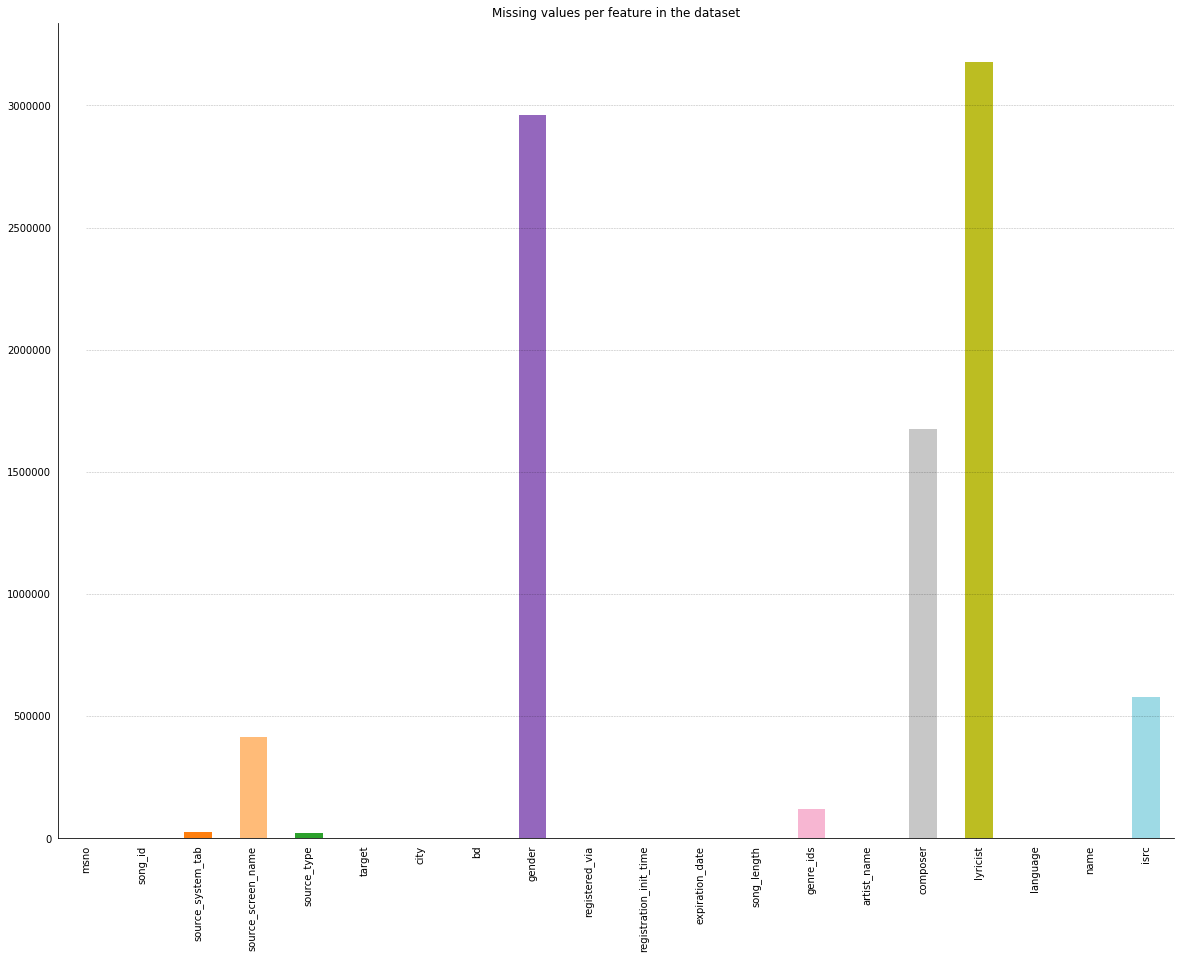

In [12]:
plot_lost_values(df_merged)

In [14]:
print(df_merged.columns)
print(df_merged.head())

                                           msno  \
0  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   
1  Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=   
2  Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=   
3  Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=   
4  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   

                                        song_id source_system_tab  \
0  BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=           explore   
1  bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=        my library   
2  JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=        my library   
3  2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=        my library   
4  3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=           explore   

    source_screen_name      source_type  target  city  bd  gender  \
0              Explore  online-playlist       1     1   0     NaN   
1  Local playlist more   local-playlist       1    13  24  female   
2  Local playlist more   local-playlist       1    13  24  female   
3 